In [1]:
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]

In [3]:
from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_openai import ChatOpenAI
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

checkpointer = MemorySaver()


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

tool = TavilySearchResults(max_results=2)
tools = [tool]
llm = ChatOpenAI()
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [4]:
graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

In [5]:
graph = graph_builder.compile(
    checkpointer=checkpointer,
    interrupt_before=["tools"],
)

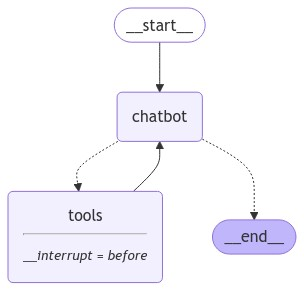

In [6]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    pass

In [7]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Hello, I am John")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='1fe1afb2-0344-4a3b-a8ba-4465bff54912'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 86, 'total_tokens': 97, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-21c0c07f-c852-45a4-af03-dbe2e5e3b158-0', usage_metadata={'input_tokens': 86, 'output_tokens': 11, 'total_tokens': 97, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}

In [8]:
config = {"configurable": {"thread_id": "100"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Sorry, did I already introduce myself?', additional_kwargs={}, response_metadata={}, id='8615f259-1155-4c21-b876-80e5f6bda3cb'),
  AIMessage(content="No, you haven't introduced yourself yet. Feel free to share a bit about yourself if you'd like!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 23, 'prompt_tokens': 89, 'total_tokens': 112, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-3cdb77e4-04b7-495d-ad09-20134ef0f628-0', usage_metadata={'input_tokens': 89, 'output_tokens': 23, 'total_tokens': 112, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})]}

In [9]:
config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="Sorry, did I already introduce myself?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='1fe1afb2-0344-4a3b-a8ba-4465bff54912'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 86, 'total_tokens': 97, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-21c0c07f-c852-45a4-af03-dbe2e5e3b158-0', usage_metadata={'input_tokens': 86, 'output_tokens': 11, 'total_tokens': 97, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
  HumanMessage(content='Sorry, did I already introduce myself?', additional_kwargs={}, response_metadata={}, id='b02f6e3d-8f01-4152-8c44-fb45b5a144d7'),
  AIMessage(content='Yes, you mention

In [10]:
snapshot = graph.get_state(config)
snapshot.next

()

In [11]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "1"}}
input_message = HumanMessage(content="How is the weather in Los Angeles?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='1fe1afb2-0344-4a3b-a8ba-4465bff54912'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 86, 'total_tokens': 97, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-21c0c07f-c852-45a4-af03-dbe2e5e3b158-0', usage_metadata={'input_tokens': 86, 'output_tokens': 11, 'total_tokens': 97, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
  HumanMessage(content='Sorry, did I already introduce myself?', additional_kwargs={}, response_metadata={}, id='b02f6e3d-8f01-4152-8c44-fb45b5a144d7'),
  AIMessage(content='Yes, you mention

In [12]:
snapshot = graph.get_state(config)
snapshot.next

('tools',)

In [13]:
graph.invoke(None, config=config)

{'messages': [HumanMessage(content='Hello, I am John', additional_kwargs={}, response_metadata={}, id='1fe1afb2-0344-4a3b-a8ba-4465bff54912'),
  AIMessage(content='Hello John! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 86, 'total_tokens': 97, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'stop', 'logprobs': None}, id='run-21c0c07f-c852-45a4-af03-dbe2e5e3b158-0', usage_metadata={'input_tokens': 86, 'output_tokens': 11, 'total_tokens': 97, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}}),
  HumanMessage(content='Sorry, did I already introduce myself?', additional_kwargs={}, response_metadata={}, id='b02f6e3d-8f01-4152-8c44-fb45b5a144d7'),
  AIMessage(content='Yes, you mention

### Timetravel

In [14]:
from langchain_core.messages import HumanMessage

config = {"configurable": {"thread_id": "2"}}
input_message = HumanMessage(content="How is the weather in Los Angeles?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='0bacec07-b5a1-43ee-a65f-fb2ad609876e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d5f3dd16-8a4e-45ee-877c-1191e84e246e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in Los Angeles'}, 'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'type': 'tool_call'}], usage_metadata={'input_tokens

In [15]:
snapshot = graph.get_state(config)
existing_message = snapshot.values["messages"][-1]
existing_message.pretty_print()

================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (call_vdaIQ9niw8mn17fIM2vXJba3)
 Call ID: call_vdaIQ9niw8mn17fIM2vXJba3
  Args:
    query: weather in Los Angeles


In [16]:
from langchain_core.messages import AIMessage, ToolMessage

answer = "It is only 5°C warm today!"
new_messages = [
    ToolMessage(content=answer, tool_call_id=existing_message.tool_calls[0]["id"]),
    AIMessage(content=answer),
]
graph.update_state(
    config,
    {"messages": new_messages},
)

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1ef90a6d-1711-69bb-8002-6b641cd3a8ae'}}

In [20]:
print((graph.get_state(config).values["messages"]))

[HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='0bacec07-b5a1-43ee-a65f-fb2ad609876e'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d5f3dd16-8a4e-45ee-877c-1191e84e246e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in Los Angeles'}, 'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'type': 'tool_call'}], usage_metadata={'input_tokens': 89, 'output_

In [18]:
config = {"configurable": {"thread_id": "2"}}
input_message = HumanMessage(content="How warm was it again?")

graph.invoke({"messages": input_message}, config=config)

{'messages': [HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='0bacec07-b5a1-43ee-a65f-fb2ad609876e'),
  AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d5f3dd16-8a4e-45ee-877c-1191e84e246e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in Los Angeles'}, 'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'type': 'tool_call'}], usage_metadata={'input_tokens

### Replay

In [22]:
all_checkpoints = []
for state in graph.get_state_history(config=config):
    all_checkpoints.append(state)
all_checkpoints

[StateSnapshot(values={'messages': [HumanMessage(content='How is the weather in Los Angeles?', additional_kwargs={}, response_metadata={}, id='0bacec07-b5a1-43ee-a65f-fb2ad609876e'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'function': {'arguments': '{"query":"weather in Los Angeles"}', 'name': 'tavily_search_results_json'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 89, 'total_tokens': 110, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-3.5-turbo-0125', 'system_fingerprint': None, 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-d5f3dd16-8a4e-45ee-877c-1191e84e246e-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'weather in Los Angeles'}, 'id': 'call_vdaIQ9niw8mn17fIM2vXJba3', 'type': 'tool_call'}], usage_met